# Advanced Linear Algebra Projet 1





Hugo Zoé Gasly Agathe 

In [1]:
from sympy import *
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

### Au début
##### On explique comment représenter un plan affine, une droite affine et un point par des équations (une équation pour les plans, deux équations pour les droites, trois équations pour les points).

Pour représenter un plan affine dans $R^{3}$, on peut utiliser une équation de la forme:
#### $$ax + by + cz + d = 0$$
**La condition**: au moins un coefficients dans {a,b,c} est non nul. \
On écrit le code en python:

In [2]:
def affine_plane_equation(a, b, c, d):
    # Justifier si le plan existe
    if a==0 and b==0 and c==0:
        return "Le plan n'existe pas."
    else:
        return f"{a}x + {b}y + {c}z + {d} = 0"


Voici deux exemples.

In [3]:
plan1 = affine_plane_equation(2, 3, 0, 7)
print(plan1)

2x + 3y + 0z + 7 = 0


In [4]:
plan1 = affine_plane_equation(0, 0, 0, 2)
print(plan1)

Le plan n'existe pas.


Pour représenter une droite affine dans $R^{3}$, on peut utiliser deux équations de la forme $ax + by + cz + d = 0$, qui représentent respectivement un plan affine. \
La droite affine est alors l'intersection de deux plans.

Supposons que ces deux plans soient
$$ P_1: a_1x + b_1y + c_1z + d_1 = 0$$
$$P_2: a_2x + b_2y + c_2z + d_2 = 0$$
Alors la droite affine peut être représentée par les équations suivantes :

$$
\left \{
            \begin{matrix}
            a_1x + b_1y + c_1z + d_1 = 0 \\
            a_2x + b_2y + c_2z + d_2 = 0 
            \end{matrix}  
\right.
$$

**La condition**: les deux plans ne peuvent pas être parallèles.

On écrit le code en python:

In [5]:
def droite_affine(plan1, plan2):
    # Les équations des plans
    a1, b1, c1, d1 = plan1
    a2, b2, c2, d2 = plan2
    # Justifier si la droite existe
    v1 = np.array([a1, b1, c1])
    v2 = np.array([a2, b2, c2])
    product=np.cross(v1,v2)
    if np.all(product == 0):
        return "La droite n'existe pas."
    else:
        return f"la droite affine est représentée par les équations suivantes: {a1}x + {b1}y + {c1}z + {d1} = 0 et {a2}x + {b2}y + {c2}z + {d2} = 0"

Voici un exemple.\
Supposons que nous avons deux plans: 
$$P_1: 1x + 2y + 3z +4 = 0$$
$$P_2: 5x + 6y + 7z + 8 = 0$$
Alors on peut représenter la droite affine correspondant:

In [6]:
droite1=droite_affine((1,2,3,4), (5,6,7,8))
print(droite1)

la droite affine est représentée par les équations suivantes: 1x + 2y + 3z + 4 = 0 et 5x + 6y + 7z + 8 = 0


Voici un autre exemple où la droite n'existe pas.

In [7]:
droite1=droite_affine((1,2,3,4), (3,6,9,12312))
print(droite1)

La droite n'existe pas.


On peut aussi chercher l'intersection de deux plans pour essayer de représenter cette ligne d'une autre manière: passer par un point et posséder un vecteur directeur.

In [8]:
def droite_equation(plan1,plan2):
    # Les équations des plans
    a1, b1, c1, d1 = plan1
    a2, b2, c2, d2 = plan2
    # Justifier si la droite existe
    v1 = np.array([a1, b1, c1])
    v2 = np.array([a2, b2, c2])
    product=np.cross(v1,v2)
    if np.all(product == 0):
        return "La droite n'existe pas."
    else:
        # Chercher l'intersection
        x = (b1*d2 - b2*d1) / (a1*b2 - a2*b1)
        y = (-a1*d2 + a2*d1) / (a1*b2 - a2*b1)
        z = (a1*c2 - a2*c1) / (a1*b2 - a2*b1)
        
        point=(x,y,z)
        direction=(b1*c2 - b2*c1, a2*c1 - a1*c2, a1*b2 - a2*b1)

        return point,direction

Voici deux exemples.

In [9]:
droite2=droite_equation((1,2,3,4), (5,6,7,8))
print(droite2)

((2.0, -3.0, 2.0), (-4, 8, -4))


In [10]:
droite2=droite_equation((1,2,3,4), (2,4,6,12))
print(droite2)

La droite n'existe pas.


Pour représenter **un point** dans $R^{3}$, on peut utiliser **trois équations** de la forme $ax + by + cz + d = 0$, qui représentent respectivement un plan affine. \
Le point est l'intersection de trois plans.

Supposons que ces trois plans soient 
$$P_1: a_1x + b_1y + c_1z + d_1 = 0$$
$$P_2: a_2x + b_2y + c_2z + d_2 = 0$$ 
$$P_3: a_3x + b_3y + c_3z + d_3 = 0$$
Alors le point peut être représentée par les équations suivantes :
$$
\left \{
            \begin{matrix}
            a_1x + b_1y + c_1z + d_1 = 0\\
            a_2x + b_2y + c_2z + d_2 = 0\\
            a_3x + b_3y + c_3z + d_3 = 0
            \end{matrix}
\right.
$$
**La condition**: parmi ces trois plans, aucun ne doit être parallèle à un autre plan.

On écrit le code en python:

In [11]:
def point(plan1, plan2, plan3):
    # Les équations des plans
    a1, b1, c1, d1 = plan1
    a2, b2, c2, d2 = plan2
    a3, b3, c3, d3 = plan3
    # Justifier si le point existe
    A = np.array([[a1,b1,c1], [a2,b2,c2], [a3,b3,c3]])
    B = np.array([[a1,b1,c1,-d1], [a2,b2,c2,-d2], [a3,b3,c3,-d3]])

    if np.linalg.matrix_rank(A) == np.linalg.matrix_rank(B) == 3:
        return f"le point est représentée par les équations suivantes: {a1}x + {b1}y + {c1}z + {d1} = 0, {a2}x + {b2}y + {c2}z + {d2} = 0 et {a3}x + {b3}y + {c3}z + {d3} = 0"
    else:
        return "Le point n'existe pas."
 

Voici un exemple.\
Supposons que nous avons trois plans: 
$$P_1: 1x + 2y + 3z +4 = 0$$
$$P_2: 5x + 6y + 7z + 8 = 0$$
$$P_3: 1x + 4y + 9z + 16 = 0$$
Alors on peut représenter le point correspondant:

In [12]:
point1=point((1,2,3,4), (5,6,7,8),(1,4,9,16))
print(point1)

le point est représentée par les équations suivantes: 1x + 2y + 3z + 4 = 0, 5x + 6y + 7z + 8 = 0 et 1x + 4y + 9z + 16 = 0


Voici un autre exemple où le point n'existe pas.

In [13]:
point1=point((1,2,3,4), (5,6,7,8),(25,30,35,16))
print(point1)

Le point n'existe pas.


On peut aussi chercher le point d'intersection de ces trois plans et essayer de le représenter directement avec les coordonnées (x, y, z). 

Selon les exigences de la question, nous ne pouvons pas utiliser directement les coordonnées pour représenter les points, mais cet algorithme sera utilisé pour les calculs futurs.

In [14]:
def point_equation(plan1,plan2,plan3):
    # Définir les symboles
    x, y, z = symbols('x y z')
    # Les équations des plans
    a1, b1, c1, d1 = plan1
    a2, b2, c2, d2 = plan2
    a3, b3, c3, d3 = plan3
    
    A = np.array([[a1,b1,c1], [a2,b2,c2], [a3,b3,c3]])
    B = np.array([[a1,b1,c1,-d1], [a2,b2,c2,-d2], [a3,b3,c3,-d3]])

    if np.linalg.matrix_rank(A) == np.linalg.matrix_rank(B) == 3:
        #Définir les équations des trois plans
        eq1 = Eq(a1*x + b1*y + c1*z + d1, 0)
        eq2 = Eq(a2*x + b2*y + c2*z + d2, 0)
        eq3 = Eq(a3*x + b3*y + c3*z + d3, 0)

        # Résoudre le système d'équations pour trouver les valeurs de x, y et z
        sol = solve((eq1, eq2, eq3), (x, y, z))
        return sol[x], sol[y], sol[z]
    else:
        return "Le point n'existe pas."

    

In [15]:
point_equation((2,1,0,0),(2,2,1,0),(2,3,2,2))

"Le point n'existe pas."

In [16]:
point_equation((1,2,3,4), (5,6,7,8),(1,4,9,16))

(-1, 3, -3)

In [17]:
point2=point_equation((1,2,3,4), (5,6,7,8),(1,4,9,16))
print(point2)

(-1, 3, -3)


### Question 1
##### Expliquer mathématiquement, en termes d’équations, comment effectuer les opérations énoncées. Le programmer en Python.

On peut construire **un plan** (1 équation) passant par **un point donné** (3 équations)
$$P_1: 𝑎_1𝑥+𝑏_1𝑦+𝑐_1𝑧+𝑑_1=0$$
$$P_2: 𝑎_2𝑥+𝑏_2𝑦+𝑐_2𝑧+𝑑_2=0$$
$$P_3: 𝑎_3𝑥+𝑏_3𝑦+𝑐_3𝑧+𝑑_3=0$$
et parallèle à **un plan donné** (1 équation)
$$P_4: 𝑎_4𝑥+𝑏_4𝑦+𝑐_4𝑧+𝑑_4=0$$

Évidemment, l'équation du plan que nous cherchons est 
$$a_4x + b_4y + c_4z + e = 0$$
où $e$ est une valeur inconnue. \
On cherche alors la valeur de $e$.

In [18]:
def plan_a(plan1,plan2,plan3,plan4):
    # Les équations des plans
    a1, b1, c1, d1 = plan1
    a2, b2, c2, d2 = plan2
    a3, b3, c3, d3 = plan3
    a4, b4, c4, d4 = plan4
    
   # Justifier si le point existe
    v1 = np.array([a1, b1, c1])
    v2 = np.array([a2, b2, c2])
    v3 = np.array([a3, b3, c3])
    product1=np.cross(v1,v2)
    product2=np.cross(v1,v3)
    product3=np.cross(v2,v3)
    if np.all(product1 == 0) or np.all(product2 == 0) or np.all(product3 == 0):
        return "Le point n'existe pas."
    else:
        # Trouver le point d'intersection des trois plans donnés
        p = point_equation(plan1,plan2,plan3)

        # Trouver la constante e du plan recherché
        e = -np.dot(([a4, b4, c4]), (p[0],p[1],p[2]))
    
        # Afficher l'équation du plan recherché
        return f"L'équation du plan recherché est {a4}x + {b4}y + {c4}z + {e} = 0"

Voici un exemple comment ce code marche.

In [19]:
plan_a1=plan_a((1,2,3,4),(1,4,9,16),(1,8,27,64),(2,3,0,7))
print(plan_a1)

L'équation du plan recherché est 2x + 3y + 0z + -10 = 0


On peut construire **un plan** (1 équation) passant par **un point donné** (3 équations)
$$P_1: 𝑎_1𝑥+𝑏_1𝑦+𝑐_1𝑧+𝑑_1=0$$
$$P_2: 𝑎_2𝑥+𝑏_2𝑦+𝑐_2𝑧+𝑑_2=0$$
$$P_3: 𝑎_3𝑥+𝑏_3𝑦+𝑐_3𝑧+𝑑_3=0$$
et perpendiculaire à **une droite** donnée (2 équations)
$$P_4: 𝑎_4𝑥+𝑏_4𝑦+𝑐_4𝑧+𝑑_4=0$$
$$P_5: 𝑎_5𝑥+𝑏_5𝑦+𝑐_5𝑧+𝑑_5=0$$

On cherche alors l'équation du plan.

In [20]:
def plan_b(plan1,plan2,plan3,plan4,plan5):
    # Les équations des plans
    a1, b1, c1, d1 = plan1
    a2, b2, c2, d2 = plan2
    a3, b3, c3, d3 = plan3
    a4, b4, c4, d4 = plan4
    a5, b5, c5, d5 = plan5
    
    # Justifier si le point existe
    v1 = np.array([a1, b1, c1])
    v2 = np.array([a2, b2, c2])
    v3 = np.array([a3, b3, c3])
    v4 = np.array([a4, b4, c4])
    v5 = np.array([a5, b5, c5])
    product1=np.cross(v1,v2)
    product2=np.cross(v1,v3)
    product3=np.cross(v2,v3)
    product4=np.cross(v4,v5)
    if np.all(product1 == 0) or np.all(product2 == 0) or np.all(product3 == 0):
        return "Le point n'existe pas."
    # Justifier si la droite existe
    elif np.all(product4 == 0):
        return "La droite n'existe pas."
    else:
        # Trouver le point d'intersection des trois plans donnés
        p = point_equation(plan1,plan2,plan3)

        # Trouver un vecteur direction de la droite
        v = np.cross(plan4[:3], plan5[:3])

        # Trouver la constante d du plan recherché
        d = -np.dot(v, p)

        # Afficher l'équation du plan recherché
        return(f"L'équation du plan recherché est {v[0]}x + {v[1]}y + {v[2]}z + {d} = 0")

Voici un exemple comment ce code marche.

In [21]:
plan_a2=plan_b((1,2,3,4),(1,4,9,16),(1,8,27,64),(2,3,0,8),(97,98,99,100))
print(plan_a2)

L'équation du plan recherché est 297x + -198y + -95z + 1996 = 0


### Question 2
##### Soit deux droites de $R^{3}$ non coplanaires (elles ne sont pas dans un même plan affine), expliquer comment calculer la perpendiculaire commune (droite qui est orthogonale aux deux droites et qui coupent chacune d’entre elles – voir la figure 1.1, de la présente page) à l’aide des seules opérations permises ci-dessus.

On suppose que la droite affine 1 est l'intersection des plans $P_1: 𝑎_1𝑥+𝑏_1𝑦+𝑐_1𝑧+𝑑_1=0$ et $P_2: 𝑎_2𝑥+𝑏_2𝑦+𝑐_2𝑧+𝑑_2=0$, et la droite affine 2 est l'intersection des plans $P_3: 𝑎_3𝑥+𝑏_3𝑦+𝑐_3𝑧+𝑑_3=0$ et $P_4: 𝑎_4𝑥+𝑏_4𝑦+𝑐_4𝑧+𝑑_4=0$.

Pour calculer la perpendiculaire commune aux deux droites dans l'espace $R^{3}$, nous suivons la méthode suivante :

Premièrement, nous définissons le plan a, qui passe par un point de la droite 1 et est perpendiculaire à la droite 2. On cherche l'équation du plan a.

Deuxièmement, nous définissons le plan b, qui passe par un point de la droite 2 et est perpendiculaire à la droite 1. On cherche  l'équation du plan b.

Ainsi, la perpendiculaire commune est l'intersection des plans a et b. Selon la règle du problème, nous pouvons produire les équations des plans a et b pour représenter cette perpendiculaire commune.

### Question 3

##### Proposer un programme Python qui montre graphiquement la construction étape par étape (à chaque nouvelle construction, on doit produire une nouvelle image).

On écrit le code suivant pour trouver la perpendiculaire commue:

Étape 1 : Nous représentons ces deux droites dans le plan.

In [22]:
plan1,plan2,plan3,plan4=(1,2,3,4),(1,3,6,5),(2,2,3,4),(2,5,6,5)

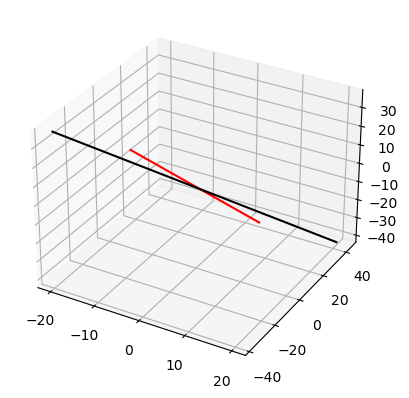

la droite 1 affine est représentée par les équations suivantes: 1x + 2y + 3z + 4 = 0 et 1x + 3y + 6z + 5 = 0; la droite 2 affine est représentée par les équations suivantes: 2x + 2y + 3z + 4 = 0 et 2x + 5y + 6z + 5 = 0


In [23]:
def plot_plane(ax, plane, xlim=(-20,20), ylim=(-20,20), zlim=(-20,20), color='blue', alpha=0.5):
    #normaliser
    norm = np.linalg.norm(plane[:3])
    plane_normalized = plane / norm
    x = np.linspace(xlim[0], xlim[1], 10)
    y = np.linspace(ylim[0], ylim[1], 10)
    X, Y = np.meshgrid(x, y)
    Z = (-plane_normalized[3] - plane_normalized[0] * X - plane_normalized[1] * Y) / plane_normalized[2]
    ax.plot_surface(X, Y, Z, color=color, alpha=alpha)

def plot_line(ax, point_on_line, line_direction, xlim=(-20,20), ylim=(-20,20), zlim=(-20,20), color='blue', alpha=0.5):
    #normaliser
    norm = np.linalg.norm(line_direction)
    line_direction_normalized = line_direction / norm

    x1, x2 = xlim
    t1 = (x1 - point_on_line[0]) / line_direction_normalized[0]
    t2 = (x2 - point_on_line[0]) / line_direction_normalized[0]
    y1 = point_on_line[1] + t1 * line_direction_normalized[1]
    y2 = point_on_line[1] + t2 * line_direction_normalized[1]
    z1 = point_on_line[2] + t1 * line_direction_normalized[2]
    z2 = point_on_line[2] + t2 * line_direction_normalized[2]
    ax.plot([x1, x2], [y1, y2], [z1, z2], color=color, alpha=alpha)


# Les équations des plans pour la droite 1
a1, b1, c1, d1 = plan1
a2, b2, c2, d2 = plan2
# Les équations des plans pour la droite 2
a3, b3, c3, d3 = plan3
a4, b4, c4, d4 = plan4

# Ici on a vérifié si la droite existe
point1,direction1=droite_equation(plan1,plan2)
point2,direction2=droite_equation(plan3,plan4)
    
fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')
#On utilise alpha pour contrôler la visibilité.
plot_line(ax,point1,direction1,color='red',alpha=1)
plot_line(ax,point2,direction2,color='black',alpha=1)
plt.show()
print (f"la droite 1 affine est représentée par les équations suivantes: {a1}x + {b1}y + {c1}z + {d1} = 0 et {a2}x + {b2}y + {c2}z + {d2} = 0; la droite 2 affine est représentée par les équations suivantes: {a3}x + {b3}y + {c3}z + {d3} = 0 et {a4}x + {b4}y + {c4}z + {d4} = 0")



In [37]:
import plotly.graph_objs as go

In [38]:

# Les équations des plans pour la droite 1
a1, b1, c1, d1 = plan1
a2, b2, c2, d2 = plan2
# Les équations des plans pour la droite 2
a3, b3, c3, d3 = plan3
a4, b4, c4, d4 = plan4

# Ici on a vérifié si la droite existe
point1, direction1 = droite_equation(plan1, plan2)
point2, direction2 = droite_equation(plan3, plan4)

# Paramétrisation de la droite 1
t = np.linspace(-10, 10, 100)
x1 = point1[0] + t * direction1[0]
y1 = point1[1] + t * direction1[1]
z1 = point1[2] + t * direction1[2]

# Paramétrisation de la droite 2
x2 = point2[0] + t * direction2[0]
y2 = point2[1] + t * direction2[1]
z2 = point2[2] + t * direction2[2]

# Création de la figure en 3D
fig = go.Figure()

# Ajout de la droite 1 à la figure
fig.add_trace(go.Scatter3d(
    x=x1, y=y1, z=z1,
    mode='lines',
    name='Droite 1',
    line=dict(color='red', width=4)
))

# Ajout de la droite 2 à la figure
fig.add_trace(go.Scatter3d(
    x=x2, y=y2, z=z2,
    mode='lines',
    name='Droite 2',
    line=dict(color='black', width=4)
))

# Configuration de la mise en page de la figure
fig.update_layout(
    scene=dict(
        xaxis=dict(title='X'),
        yaxis=dict(title='Y'),
        zaxis=dict(title='Z')
    ),
    margin=dict(l=0, r=0, t=0, b=0)
)

# Affichage de la figure
fig.show()
print (f"la droite 1 affine est représentée par les équations suivantes: {a1}x + {b1}y + {c1}z + {d1} = 0 et {a2}x + {b2}y + {c2}z + {d2} = 0; la droite 2 affine est représentée par les équations suivantes: {a3}x + {b3}y + {c3}z + {d3} = 0 et {a4}x + {b4}y + {c4}z + {d4} = 0")


la droite 1 affine est représentée par les équations suivantes: 1x + 2y + 3z + 4 = 0 et 1x + 3y + 6z + 5 = 0; la droite 2 affine est représentée par les équations suivantes: 2x + 2y + 3z + 4 = 0 et 2x + 5y + 6z + 5 = 0


Étape 2 : Nous définissons le plan a, qui passe par un point de la droite 1 et est perpendiculaire à la droite 2. On cherche  l'équation du plan a.

In [1]:
def perpendicular_plan(point,line_point, line_direction):
    point = np.array(point)
    normal = np.cross(line_direction, point - line_point)
    d = -np.dot(normal, point)
    a,b,c=normal
    return a,b,c,d

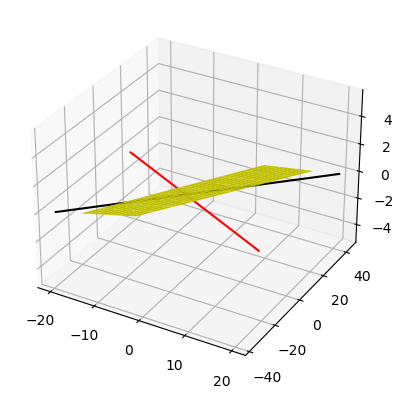

In [26]:
a1x,a2x,a3x,a4x=perpendicular_plan(point1,point2,direction2)
plan_a=[a1x,a2x,a3x,a4x]
    
fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')
plot_line(ax,point1,direction1,color='red',alpha=1)
plot_line(ax,point2,direction2,color='black',alpha=1)
#On utilise la couleur "jaune" pour présenter le premier plan. Ici, on fait alpha=1 pour bien visualier et pour "souligner".
plot_plane(ax,plan_a,color='yellow',alpha=1)
plt.show()

In [2]:
x=np.linspace(-20, 20, 10)
y=np.linspace(-20, 20, 10)
X, Y = np.meshgrid(x, y)
Z = (-plan_a[0] * X - plan_a[1] * Y - plan_a[3]) / plan_a[2]
plane = go.Surface(x=X, y=Y, z=Z, opacity=0.5)
layout = go.Layout(scene=dict(xaxis=dict(title='X'), yaxis=dict(title='Y'), zaxis=dict(title='Z')))
fig = go.Figure(data=[plane], layout=layout)
fig.show()

NameError: name 'np' is not defined

Étape 3 : Nous définissons le plan b, qui passe par un point de la droite 2 et est perpendiculaire à la droite 1.On cherche l'équation du plan b.


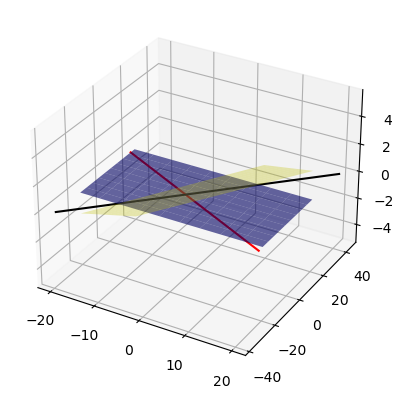

In [27]:
b1x,b2x,b3x,b4x=perpendicular_plan(point2,point1,direction1)
plan_b=[b1x,b2x,b3x,b4x]
    
fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')
plot_line(ax,point1,direction1,color='red',alpha=1)
plot_line(ax,point2,direction2,color='black',alpha=1)
#On utilise la couleur "jaune" pour présenter le premier plan. Ici, on fait alpha=0.3 pour bien visualier.
plot_plane(ax,plan_a,color='yellow',alpha=0.3)
#On utilise la couleur "bleue" pour présenter le premier plan. Ici, on fait alpha=0.6 pour bien visualier et pour "souligner".
plot_plane(ax,plan_b,color='blue',alpha=0.6)
plt.show()


Étape 4 : La perpendiculaire commune est l'intersection des plans a et b. Nous mettons en gras cette ligne de perpendicularité commune.


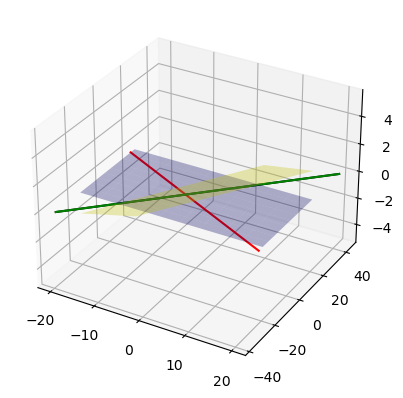

In [28]:
point3,direction3=droite_equation((a1x,a2x,a3x,a4x),(b1x,b2x,b3x,b4x))
fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')


plot_line(ax,point1,direction1,color='red',alpha=1)
plot_line(ax,point2,direction2,color='black',alpha=1)
#On utilise la couleur "jaune" pour présenter le premier plan. Ici, on fait alpha=0.3 pour bien visualier.
plot_plane(ax,plan_a,color='yellow',alpha=0.3)
#On utilise la couleur "jaune" pour présenter le premier plan. Ici, on fait alpha=0.3 pour bien visualier.
plot_plane(ax,plan_b,color='blue',alpha=0.3)
#On trace cette perpendiculaire commune pour la placer au-dessus des autres éléments afin de mieux visualier.
plot_line(ax,point3,direction3,color='green',alpha=1)



plt.show()

### Question 4
##### Peut-on, avec ce programme, construire une droite (2 équations) passant par deux points (3+3 équations)? 
$$P_1: 𝑎_1𝑥+𝑏_1𝑦+𝑐_1𝑧+𝑑_1=0$$
$$P_2: 𝑎_2𝑥+𝑏_2𝑦+𝑐_2𝑧+𝑑_2=0$$
$$P_3: 𝑎_3𝑥+𝑏_3𝑦+𝑐_3𝑧+𝑑_3=0$$

$$P_4: 𝑎_4𝑥+𝑏_4𝑦+𝑐_4𝑧+𝑑_4=0$$
$$P_5: 𝑎_5𝑥+𝑏_5𝑦+𝑐_5𝑧+𝑑_5=0$$
$$P_5: 𝑎_6𝑥+𝑏_6𝑦+𝑐_6𝑧+𝑑_6=0$$
#####  Justifier. 


### Oui, on peut.

Avant de construire la droite, nous avons d'abord écrire une fonction pour déterminer si trois points (chaque représenté par 3 équations) sont situé sur une même droite.

In [29]:
def verifier_point(plan1, plan2, plan3, plan4, plan5, plan6, plan7, plan8, plan9):
    t1= point_equation(plan1, plan2, plan3)
    t2= point_equation(plan4, plan5, plan6)
    t3= point_equation(plan7, plan8, plan9)
    #Justifier si les trois points existent
    if len(t1)==3 and len(t2)==3 and len(t3)==3:
        a1, b1, c1 = t1
        a2, b2, c2 = t2
        a3, b3, c3 = t3
        #Justifier si les trois points sont situé sur une même droite
        vec1 = np.array([a1-a3,b1-b3,c1-c3])
        vec2 = np.array([a2-a3,b2-b3,c2-c3])
        pro = np.cross(vec1,vec2)
        if np.all(pro == 0):
            return 0
        else:
            return 1
    else:
        print ("Au moins un point n'existe pas.")
        return 0

Voici un exemple comment ce code marche.

In [30]:
verifier_point((1,0,0,0),(1,3,0,3),(1,1,1,0),(2,1,0,0),(2,3,1,0),(2,7,2,2),(3,1,0,0),(3,1,1,0),(3,3,2,2))

1

Ensuite, nous définissons une fonction qui permet, lorsque nous entrons les cordonéees de trois points (chaque représenté par 3 équations), de générer le plan généré de ces trois points. La sortie de la fonction est $(ai, bi, ci, di)$, où $a_ix + b_iy + c_iz + d_i = 0$ est l’équation du plan.

Lorsque les trois points sont situé une même droite, les paramètres du plan généré sont $(0, 0, 0, 0)$.

In [31]:
def construire_plan(plan1, plan2, plan3, plan4, plan5, plan6, plan7, plan8, plan9):
    
    if verifier_point(plan1, plan2, plan3, plan4, plan5, plan6, plan7, plan8, plan9) == 1:
        #Obtenir les trois points
        a1, b1, c1 = point_equation(plan1, plan2, plan3)
        a2, b2, c2 = point_equation(plan4, plan5, plan6)
        x, y, z = point_equation(plan7, plan8, plan9)
        
        #Construire le plan
        vec1 = np.array([a1-x, b1-y, c1-z])
        vec2 = np.array([a2-x, b2-y, c2-z])
        vec3 = np.cross(vec1, vec2)
        e = -np.dot((vec3[0], vec3[1], vec3[2]), (a1,b1,c1))
        return (vec3[0], vec3[1], vec3[2], e)
    else:
        return (0, 0, 0, 0)

Voici un exemple comment ce code marche.

In [32]:
construire_plan((1,0,0,0),(1,3,0,3),(1,1,1,0),(2,1,0,0),(2,3,1,0),(2,7,2,2),(3,1,0,0),(3,1,1,0),(3,3,2,2))

(0, 5/6, 0, 5/6)

Deux points (chaque représenté par 3 équations) non superposés peuvent déterminer une droite. Il existe de nombreuses façons de représenter une droite en termes de deux équations, et il y a de nombreuse façons de trouver l'une de ces situations, ici on considère de trouver un point supplémentaire dans l'èspace, avec les deux points que nous avons obtenus par les six équations, pour déterminer l'équation d'un plan. En tenant compte de certaines circonstances particulières,nous avons pris les mesures nécessaires de jugement pour éviter les problèmes.

In [33]:
def construire_droite1(plan1, plan2, plan3, plan4, plan5, plan6):
    point1 = point_equation(plan1, plan2, plan3)
    point2 = point_equation(plan4, plan5, plan6)
    
    #Justifier si les deux droites existent
    if point1 == point2 or type(point1) is str or type(point2) is str:
        return "La droite n'existe pas."
    else:
        #Les plans 7 à 12 sont utilisés pour générer les points (0,0,0), (1,0,0), (0,1,0) et (0,0,1) dans le système de coordonnées.
        plan7 = (1,0,0,0)
        plan8 = (0,1,0,0)
        plan9 = (0,0,1,0)
        plan10 = (1,0,0,1)
        plan11 = (0,1,0,1)
        plan12 = (0,0,1,1)
       
        #construire et sélectionner deux plans pour représenter la droite
        #plan7, plan8 et plan9 construisent le point (0,0,0)
        Plan1 = construire_plan(plan1, plan2, plan3, plan4, plan5, plan6, plan7, plan8, plan9)
        #plan10, plan8 et plan9 construisent le point (1,0,0)
        Plan2 = construire_plan(plan1, plan2, plan3, plan4, plan5, plan6, plan10, plan8, plan9)
        #plan7, plan11 et plan9 construisent le point (0,1,0)
        Plan3 = construire_plan(plan1, plan2, plan3, plan4, plan5, plan6, plan7, plan11, plan9)
        #plan7, plan8 et plan12 construisent le point (0,0,1)
        Plan4 = construire_plan(plan1, plan2, plan3, plan4, plan5, plan6, plan7, plan8, plan12)
        if not(type(droite_equation(Plan1,Plan2))is str):
            return f"les paramètres des deux équations de la droite sont({Plan1}, {Plan2})"
        elif not(type(droite_equation(Plan1,Plan3))is str):
            return f"les paramètres des deux équations de la droite sont({Plan1}, {Plan3})"
        elif not(type(droite_equation(Plan1,Plan4))is str):
            return f"les paramètres des deux équations de la droite sont({Plan1}, {Plan4})"
        elif not(type(droite_equation(Plan2,Plan3))is str):
            return f"les paramètres des deux équations de la droite sont({Plan2}, {Plan3})"
        elif not(type(droite_equation(Plan2,Plan4))is str):
            return f"les paramètres des deux équations de la droite sont({Plan2}, {Plan4})"
        else:
            return f"les paramètres des deux équations de la droite sont({Plan3}, {Plan4})"
        

Voici un exemple comment ce code marche.

In [34]:
construire_droite1((1,2,3,4), (5,6,7,8),(1,4,9,16), (1,2,3,8), (5,6,7,16),(1,4,9,32))

'les paramètres des deux équations de la droite sont((0, 3, 3, 0), (-3, 0, 1, 0))'

##### Peut-on, avec ce programme, construire une droite (2 équations) passant par un point (3 équations) 
$$P_1: 𝑎_1𝑥+𝑏_1𝑦+𝑐_1𝑧+𝑑_1=0$$
$$P_2: 𝑎_2𝑥+𝑏_2𝑦+𝑐_2𝑧+𝑑_2=0$$
$$P_3: 𝑎_3𝑥+𝑏_3𝑦+𝑐_3𝑧+𝑑_3=0$$

##### et perpendiculaire à un plan donné (1 équation)?
$$P_4: 𝑎_4𝑥+𝑏_4𝑦+𝑐_4𝑧+𝑑_4=0$$

### Oui, on peut.

Comme avant, nous avons d’innombrables façons d’exprimer cette ligne droite.

Nous devons déterminer deux plans. $vec0$ est un vecteur perpendiculaire au plan donné $P4$, qui est parallèle à la ligne que nous voulons. 

Nous choisissons les vecteurs de base $vec1$, $vec2$ et $vec3$ de $R^{3}$. $vec0$ n’est pas colinéaire avec au moins deux des vecteurs $vec1$, $vec2$ et $vec3$, donc nous en choisissons deux. 

De cette façon, nous pouvons obtenir deux plans à partir de $vec0$. Le plan 1 est le produit vectoriel de $vec0$ et du premier vecteur choisi, et passe par le point P (représenté par 3 plans). Le plan 2 est le produit vectoriel de $vec0$ et du second vecteur choisi, et passe par le point P (représenté par 3 plans). 

Ainsi, nous avons obtenu les équations de deux plans représentant cette ligne droite.

In [35]:
def construire_droite2(plan1, plan2, plan3, plan4):
    point = point_equation(plan1,plan2,plan3)
    u0, v0, w0, h0 = plan4
    vec0 = np.array([u0, v0, w0])
    #Choisir les vecteurs de base dans R3
    vec1 = np.array([1,0,0])
    vec2 = np.array([0,1,0])
    vec3 = np.array([0,0,1])
    
    #Construire deux plans
    if np.all(np.cross(vec0, vec1) == 0):
        nor1 = np.cross(vec0, vec2)
        nor2 = np.cross(vec0, vec3)
    else:
        if np.all(np.cross(vec0, vec2) == 0):
            nor1 = np.cross(vec0, vec1)
            nor2 = np.cross(vec0, vec3)
        else:
            nor1 = np.cross(vec0, vec1)
            nor2 = np.cross(vec0, vec2)
    e1 = -np.dot((nor1[0], nor1[1], nor1[2]), point)
    e2 = -np.dot((nor2[0], nor2[1], nor1[2]), point)
    return f"Les équations des plans recherchées sont {nor1[0]}x + {nor1[1]}y + {nor1[2]}z + {e1} = 0 et {nor2[0]}x + {nor2[1]}y + {nor2[2]}z + {e2} = 0"

Voici un example comment ce code marche.

In [36]:
construire_droite2((1,2,3,4), (5,6,7,8), (1,4,9,16), (1,1,1,1))

'Les équations des plans recherchées sont 0x + 1y + -1z + -6 = 0 et -1x + 0y + 1z + -4 = 0'

### C'est fini!